# Case - Google Jobs 2018
    Candidato: Rodrigo Didier
    Vaga: Data Analyst
    
# Sobre a base de dados:
   ### Variáveis contidas:
       - Company: Companhia que oferece a vaga.
       - Title: Título da vaga.
       - Category: Categoria da vaga.
       - Location: Local da vaga (País/estado/cidade).
       - Responsibilities: Responsabildades associadas à vaga.
       - Minimum Qualifications: Qualificações mínimas para a vaga.
       - Preferred Qualifications: Qualificações preferidas à vaga.

# PRÉ-PROCESSAMENTO
## Vamos inicialmente verificar se há inconscistências no dataset e limpá-lo conforme for necessário.

In [1]:
#import libs
import pandas as pd
import numpy as np
from collections import Counter
import unidecode as unc
import matplotlib.pyplot as plt
import matplotlib 
from wordcloud import WordCloud, ImageColorGenerator
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
import re
import warnings
warnings.filterwarnings("ignore")
matplotlib.axes.Axes.pie
matplotlib.pyplot.pie


[nltk_data] Downloading package wordnet to /home/didier/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/didier/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/didier/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /home/didier/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<function matplotlib.pyplot.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=None, radius=None, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, data=None)>

In [2]:
# Reading data
df_jobs = pd.read_excel("job_skills.xlsx")

#Descrição do dataset
df_jobs.describe()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
count,1250,1250,1250,1250,1235,1236,1236
unique,2,794,23,92,801,807,821
top,Google,Business Intern 2018,Sales & Account Management,"Mountain View, CA, United States",Responsibilities and detailed projects will be...,Must be pursuing a full-time MBA program with ...,"Previous internship experience in Sales, Adver..."
freq,1227,35,168,190,33,32,32


In [3]:
# Identificando missing values - isna == isnull no pandas.
df_jobs.isnull().sum()

Company                      0
Title                        0
Category                     0
Location                     0
Responsibilities            15
Minimum Qualifications      14
Preferred Qualifications    14
dtype: int64

In [4]:
#Removendo NaN da análise
df_jobs = df_jobs.dropna()

#Descrevendo o dataset limpo
df_jobs.describe()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
count,1235,1235,1235,1235,1235,1235,1235
unique,2,779,23,91,801,806,820
top,Google,Business Intern 2018,Sales & Account Management,"Mountain View, CA, United States",Responsibilities and detailed projects will be...,Must be pursuing a full-time MBA program with ...,Interest in the technology industry and Google...
freq,1212,35,168,187,33,32,32


In [5]:
#Verificando quais as companhias que estão oferecendo jobs
df_job_company = df_jobs.groupby(["Company"]).size().reset_index().rename(columns = {0: 'Job Offers'}).sort_values(by=["Job Offers"],ascending= False).set_index('Company')
df_job_company

,Job Offers
Company,
Google,1212
YouTube,23


Embora o YouTube seja uma companhia do Google, acredito que o perfil
das vagas deva ser diferente. Por tanto, vamos removê-las.

In [6]:
#Removendo as vagas para o Youtube da análise (perfil diferente)
df_jobs = df_jobs[df_jobs["Company"] != "Youtube"]

#### 1. Quais são os países com mais vagas anunciadas pela Google? 
#### Como você construiria um gráfico que demonstre o resultado da   contagem?

Não temos uma coluna específica para o país de origem então teremos que obtê-lo à partir da variável Location.

Para construir o gráfico vamos olhar a distribuição dos nossos dados e escolher a amostra e o tipo de gráfico mais adequado ao contexto.

In [7]:
#Criando a variável country à partir da variável Location
df_jobs["Country"] = df_jobs["Location"].apply(lambda x: x.split(",")[-1])

#Agrupando por Country
df_job_country = df_jobs.groupby(["Country"]).size().reset_index().rename(columns = {0: 'Job Offers'}).sort_values(by=["Job Offers"],ascending= True).set_index('Country')

#### Descrevendo a distribuição de ofertas por país para definir qual amostra dos nossos dados vamos exibir no gráfico. 
    -> Vamos exibir os dados que pertencem a pelo menos o 4ºQuatil.

In [8]:
df_job_country.describe()

,Job Offers
count,49.000000
mean,25.204082
std,89.158796
min,1.000000
25%,2.000000
50%,5.000000
75%,15.000000
max,624.000000


In [9]:
#Distribuição de vagas nos países (freq acima do 4º quartil )
df_job_country_max = df_job_country[df_job_country["Job Offers"] >= 15].sort_values(by=["Job Offers"],ascending= True)
df_job_country_max.sort_values(by=["Job Offers"],ascending= False)

,Job Offers
Country,
United States,624
Ireland,87
United Kingdom,62
Germany,53
Singapore,41
China,38
Australia,35
Japan,31
Taiwan,30


* Podemos observar que há 15 vagas para o Brasil. (questão 2.)

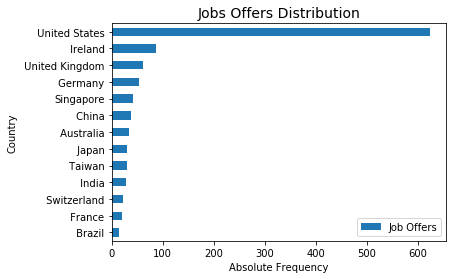

In [10]:
#Show barh
ax1 = df_job_country_max.plot.barh()  
plt.title('Jobs Offers Distribution',fontsize=14)
plt.xlabel('Absolute Frequency')
plt.show()

#### 3. Quais são as qualificações mínimas e desejáveis que o Google mais exige?
    Vamos ver quais os graus de formação acadêmica mínimos e preferidos pelo Google além de realizar uma análise das palavras mais significativas em cada caso. Será que separando elas morfologicamente, conseguimos alguma informação interessante? Vamos descobrir.

In [11]:
#função que separa por nível de instrução mínimo/Preferido
def split_degree(src, to_fill):   
    for i in range(len(df_jobs)): 
        if ((df_jobs[src][i].find("currently enrolled in a bachelor's") != -1) or (df_jobs[src][i].find("currently pursuing") != -1) or (df_jobs[src][i].find("enrolled in any major") != -1)):
            df_jobs[to_fill][i] = 'Bachelor Student'
        elif (df_jobs[src][i].find("mba") != -1):
            df_jobs[to_fill][i] = 'MBA'
        elif (df_jobs[src][i].find("bachelor's degree in") != -1) or (df_jobs[src][i].find("ba/bs") != -1) or (df_jobs[src][i].find("bs") != -1) or (df_jobs[src][i].find("ba") != -1):
            df_jobs[to_fill][i] = "Bachelor's"
        elif (df_jobs[src][i].find("master's degree") != -1) or (df_jobs[src][i].find("ms") != -1) or (df_jobs[src][i].find("master") != -1):
            df_jobs[to_fill][i] = "Master's"
        elif (df_jobs[src][i].find("phd") != -1) or (df_jobs[src][i].find("ph.d") != -1):
            df_jobs[to_fill][i] = "PhD"
        else:
            df_jobs[to_fill][i] = "Specific Experiences"

def plot_bar(result,rotation, title, ft_size):
    result.plot.bar(rot = rotation)
    plt.title( title,fontsize=ft_size)
    plt.show()

def plot_pie(lbls, szs, clrs, xpld, title):
    plt.pie(szs, explode=xpld, labels=lbls, colors=clrs,
    autopct='%1.1f%%', shadow=True, startangle=140)
    plt.title( title,fontsize=24)
    plt.axis('equal')
    plt.show()


In [12]:

#Padronizando o tamanho das letras para facilitar a análise
df_jobs["Minimum Qualifications"] = df_jobs["Minimum Qualifications"].str.lower()
df_jobs["Preferred Qualifications"] = df_jobs["Preferred Qualifications"].str.lower()

#Precisamos resetar os index por conta das linhas removidas para podermos iterar sobre elas
df_jobs = df_jobs.reset_index(drop=True)

#Criando colunas que receberão strings de classifição quanto ao tipo de formação.
df_jobs["min_degree"] = 'a'
df_jobs["max_degree"] = 'a'


In [13]:
#Separando por níveis de instrução mínimo/preferido
split_degree("Minimum Qualifications","min_degree")
split_degree("Preferred Qualifications","max_degree")

#Agrupando por qualificação requerida
df_jobs_min_degree = df_jobs.groupby(["min_degree"]).size().reset_index().rename(columns = {0: 'min qualification'}).sort_values(by=["min qualification"],ascending= True).set_index('min_degree')

#Agrupando por qualificação preferida
df_jobs_max_degree = df_jobs.groupby(["max_degree"]).size().reset_index().rename(columns = {0: 'max qualification'}).sort_values(by=["max qualification"],ascending= True).set_index('max_degree')

#Realizando o join dos agrupamentos
result = df_jobs_min_degree
result = result.join(df_jobs_max_degree).rename(columns = {"min qualification":'required', 'max qualification':'preferred'}).rename_axis('qualifications')

#Obtendo as qualificações que aceitam uma experiência prática relevante ao invés das outras formações
df_jobs["equivalent"] = "others"
for i in range(len(df_jobs)): 
    if (df_jobs["Minimum Qualifications"][i].find("equivalent practical experience") != -1):
        df_jobs["equivalent"][i] = 'Equivalent Practical Experience'

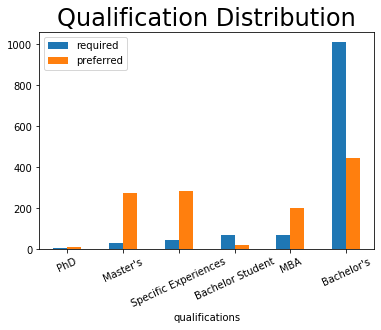

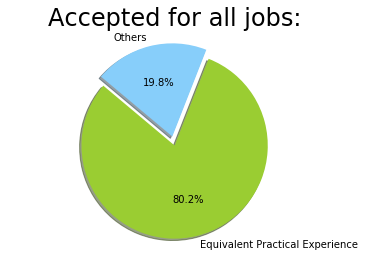

In [14]:
#Show bar
plot_bar(result, 25, "Qualification Distribution", 24)

#Show pie
plot_pie(['Equivalent Practical Experience', 'Others'], [990, 245], ['yellowgreen', 'lightskyblue'], (0, 0.1), "Accepted for all jobs:")

In [15]:
#Função para limpar todas as listas contidas nas lista de frases
def clean_list (list_clean):
    list_all_clean_words = []
    punc = '.,;\"()-&'
    for j in punc:
        list_clean = [i.replace(j,'').lower() for i in list_clean]
    for palavra in list_clean:
        list_all_clean_words.append(unc.unidecode(palavra))
    return (list_all_clean_words)

#def split_list_by_words (list_all_clean_words)
def split_list_words (list_all_clean):
    list_words = []
    for linha in list_all_clean:
        for termo in linha.split():
            list_words.append(termo)
    return (list_words)

In [16]:
#Criando lista de Minimum Qualification  (list_minq)
list_minq = list(df_jobs["Minimum Qualifications"])

#Criando lista de Preferred Qualification (list_prefq)
list_prefq = list(df_jobs["Preferred Qualifications"])

#Criando lista de Responsibilities (list_prefq)
list_respon = list(df_jobs["Responsibilities"])

In [17]:
#Criando lista de palavras à partir de list_minq, list_prefq e Renspons...
list_minq_clean = []
list_prefq_clean = []
list_respon_clean = []
list_minq_clean = clean_list(list_minq)
list_prefq_clean = clean_list(list_prefq)
list_respon_clean = clean_list(list_respon)

In [18]:
#Criando lista limpa com todas as palavras
list_all_clean_words_minq = []
list_all_clean_words_prefq = []
list_all_clean_words_respon = []
list_all_clean_words_minq = split_list_words(clean_list(list_minq_clean))
list_all_clean_words_prefq = split_list_words(clean_list(list_prefq_clean))
list_all_clean_words_respon = split_list_words(clean_list(list_respon_clean))

In [19]:
#Criando lista de stop words
stop_words1 = []
stop_words = stopwords.words('english')
stop_words1 = stop_words + ["minimum","similar","please","related","student","2019","2018","etc","able","june","level","platform","equivalent", "practical","experience","phd","ms","master's","master","currently","enrolled","bachelor's","ba","bs","ba/bs","pursuing","major","bachelor","mba","degree","go","cloud","html5","c++","sas","python","java","c","c#","php","javascript","r","ruby","perl","sql","html"]

#Função que transforma lista em df com freq de palavras (já sem stop words)
def list_to_freq_df (list_words,stop_words):
    serie_words = pd.Series(list_words)
    freq_words= Counter(serie_words)
    df_freq_words = pd.DataFrame.from_dict(freq_words, orient='index').reset_index()
    df_freq_words=df_freq_words.sort_values(by=[0],ascending= False).rename(columns = {0: 'freq', 'index':'word'})
    df_freq_words = df_freq_words.set_index('word')
    df_freq_words_clean = df_freq_words[~df_freq_words.index.isin(stop_words)]
    df_freq_words_clean.reset_index(level=0, inplace=True)
    return(df_freq_words_clean)

In [20]:
#Df com freq por word - full
df_freq_words_clean_minq = list_to_freq_df(list_all_clean_words_minq,stop_words1)
df_freq_words_clean_prefq = list_to_freq_df(list_all_clean_words_prefq,stop_words1)
df_freq_words_clean_respon = list_to_freq_df(list_all_clean_words_respon,stop_words1)

Vamos verificar a distribuição dos df obtidos.
Isso nos ajudará a saber com qual parte dele vamos trabalhar.

In [21]:
#Verificando a distribuição de freq das palavras limpas da variável
# Minimal Qualifications:
df_freq_words_clean_minq.describe()

,freq
count,2088.000000
mean,10.954502
std,35.092230
min,1.000000
25%,1.000000
50%,2.000000
75%,6.000000
max,722.000000


In [22]:
#Verificando a distribuição de freq das palavras limpas da variável
# Preferred Qualifications:
df_freq_words_clean_prefq.describe()

,freq
count,3475.000000
mean,15.312230
std,59.558721
min,1.000000
25%,1.000000
50%,3.000000
75%,9.000000
max,1853.000000


In [23]:
#Verificando a distribuição de freq das palavras limpas da variável
# Responsibilites:
df_freq_words_clean_respon.describe()

,freq
count,4219.000000
mean,17.466935
std,56.983981
min,1.000000
25%,1.000000
50%,3.000000
75%,10.000000
max,1207.000000


In [24]:
#Como queremos as principais,
#selecionado todas as palavras do 4º quartil.
df_top_freq_words_minq = df_freq_words_clean_minq[df_freq_words_clean_minq["freq"] >= 7]
df_top_freq_words_prefq = df_freq_words_clean_prefq[df_freq_words_clean_prefq["freq"] >= 9]
df_top_freq_words_respon = df_freq_words_clean_respon[df_freq_words_clean_respon["freq"] >= 9]

* Ideia que pode ser explorada: Pergar n-uplas (2a2, 3a3, etc...) pois muitas palavras contém mais informações quando estão agrupadas.

In [25]:
# Função para criar tokens das palavras
def tokenizer_text (df_freq_words_clean):
    text = ' '.join(list(df_freq_words_clean["word"]))
    tokens = word_tokenize(text)
    list_pos_tag = nltk.pos_tag(tokens)
    return (list_pos_tag)

In [26]:
#Criando lista tokenizada minq e prefq
list_tokenized_minq = tokenizer_text(df_top_freq_words_minq)
list_tokenized_prefq = tokenizer_text(df_top_freq_words_prefq)
list_tokenized_respon = tokenizer_text(df_top_freq_words_respon)

In [27]:
#Transformando a lista de tuplas em dataframe
df_morph_by_word_minq = pd.DataFrame.from_dict(list_tokenized_minq).rename(columns = {0:'word', 1:'morphology'}).set_index('morphology')
df_morph_by_word_prefq = pd.DataFrame.from_dict(list_tokenized_prefq).rename(columns = {0:'word', 1:'morphology'}).set_index('morphology')
df_morph_by_word_respon = pd.DataFrame.from_dict(list_tokenized_respon).rename(columns = {0:'word', 1:'morphology'}).set_index('morphology')

In [28]:
#Criando funções para análise com NLP
def joins_morphologically (pos_tags_list, df_morph_by_word):
    words = list(df_morph_by_word[df_morph_by_word.index.isin(pos_tags_list)]["word"])
    return (' '.join(words))

#Plota gráfico: nuvem de palavras
def plot_word_cloud (join_morph, title, size_title):
    wc = WordCloud(background_color="white").generate(join_morph)
    plt.figure()
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.margins(x=10, y=0)
    plt.title(title,size=size_title)

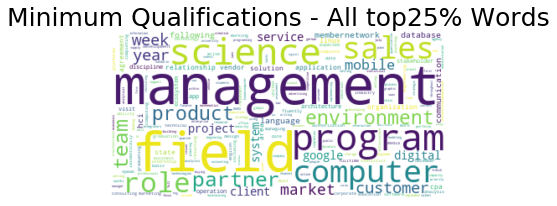

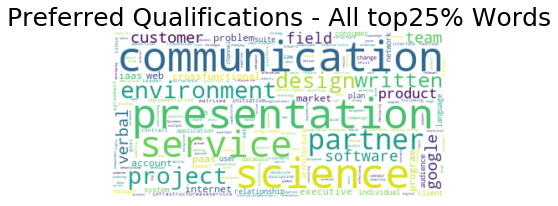

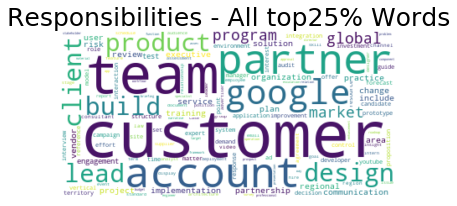

In [29]:
plot_word_cloud(' '.join(list(df_top_freq_words_minq["word"])),'Minimum Qualifications - All top25% Words',25)
plot_word_cloud(' '.join(list(df_top_freq_words_prefq["word"])),'Preferred Qualifications - All top25% Words',25)
plot_word_cloud(' '.join(list(df_top_freq_words_respon["word"])),'Responsibilities - All top25% Words',25)

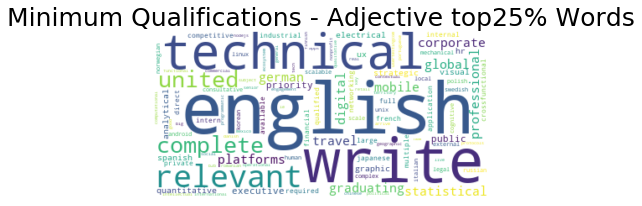

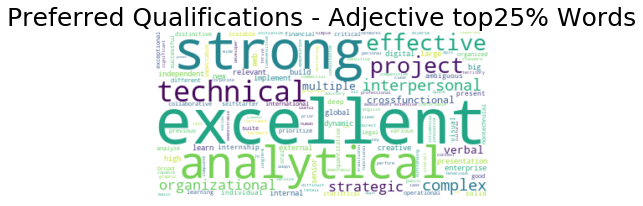

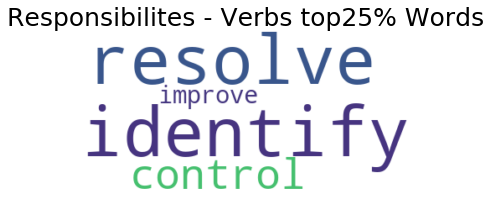

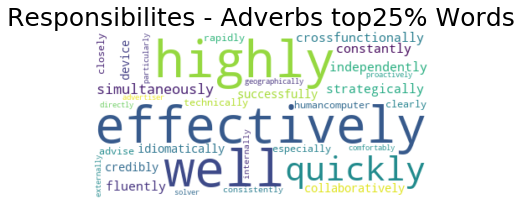

In [30]:
plot_word_cloud(joins_morphologically(['JJ'],df_morph_by_word_minq),'Minimum Qualifications - Adjective top25% Words',25)
plot_word_cloud(joins_morphologically(['JJ'],df_morph_by_word_prefq),'Preferred Qualifications - Adjective top25% Words',25)
plot_word_cloud(joins_morphologically(['VB'],df_morph_by_word_prefq),'Responsibilites - Verbs top25% Words',25)
plot_word_cloud(joins_morphologically(['RB'],df_morph_by_word_prefq),'Responsibilites - Adverbs top25% Words',25)

#### 4. Quais skills de programação são mais pedidas nas vagas do Google?

In [31]:
#Criando lista com as skills de prog identificadas analisando a lista de palavras e vendo listas na internet com linguagens mais usadas em 2018
programinng_skills = ['go','cloud','html5','c++','sas','python', 'java', 'c','c#','php', 'javascript', 'r', 'ruby', 'perl','sql', 'html','linux']

# redefinindo o df com freq por word - full
df_freq_words_clean_minq = list_to_freq_df(list_all_clean_words_minq,stop_words)
df_freq_words_clean_prefq = list_to_freq_df(list_all_clean_words_prefq,stop_words)


In [32]:
#Criando df com freq de prog skill (minimal and preferred)
df_freq_prog_skills_minq = df_freq_words_clean_minq.rename(columns = {'word':'Skills', 'freq':'Minimum'}).set_index("Skills")
df_freq_prog_skills_minq = df_freq_prog_skills_minq[df_freq_prog_skills_minq.index.isin(programinng_skills)]
df_freq_prog_skills_prefq = df_freq_words_clean_prefq.rename(columns = {'word':'Skills2', 'freq':'Preferred'}).set_index("Skills2")
df_freq_prog_skills_prefq = df_freq_prog_skills_prefq[df_freq_prog_skills_prefq.index.isin(programinng_skills)]

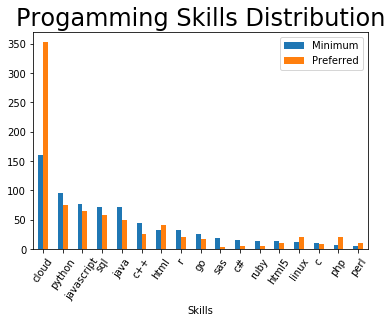

In [33]:
#Join nos resultados obtidos
result = df_freq_prog_skills_minq
result = result.join(df_freq_prog_skills_prefq) #.rename(columns = {"min qualification":'required', 'max qualification':'preferred'}).rename_axis('qualifications')

#Show bar
plot_bar(result, 55, "Progamming Skills Distribution", 24)

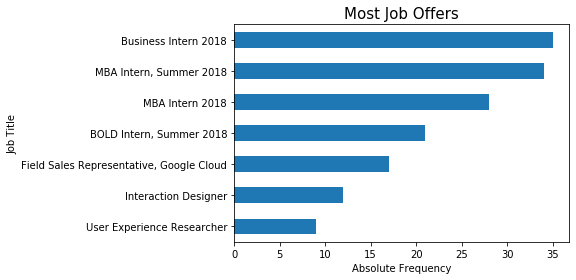

In [34]:
#Verificando os jobs com mais ofertas pelo Google
df_freq_job_title = pd.DataFrame.from_dict(Counter(df_jobs["Title"]), orient='index').reset_index()
df_freq_job_title=df_freq_job_title.sort_values(by=[0],ascending= False).rename(columns = {0: 'freq', 'index':'Job Title'})
df_freq_job_title = df_freq_job_title.set_index('Job Title')
df_top_freq_job_title = df_freq_job_title[df_freq_job_title["freq"] >= 9]
df_top_freq_job_title.sort_values(by=["freq"],ascending= True).plot.barh(y = 'freq',legend=False)
plt.title("Most Job Offers",fontsize= 15)
plt.xlabel('Absolute Frequency')
plt.show()

Text(0.5, 0, 'Absolute Frequency')

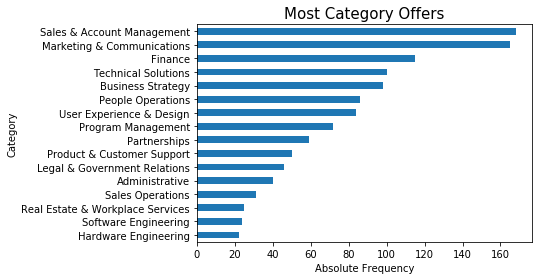

In [35]:
#Verificando as categorias de jobs com mais ofertas pelo Google
df_freq_job_category = pd.DataFrame.from_dict(Counter(df_jobs["Category"]), orient='index').reset_index()
df_freq_job_category=df_freq_job_category.sort_values(by=[0],ascending= False).rename(columns = {0: 'freq', 'index':'Category'})
df_freq_job_category = df_freq_job_category.set_index('Category')
df_top_freq_job_category = df_freq_job_category[df_freq_job_category["freq"] >= 20]
df_top_freq_job_category.sort_values(by=["freq"],ascending= True).plot.barh(y = 'freq',legend=False)
plt.title("Most Category Offers",fontsize= 15)
plt.xlabel('Absolute Frequency')

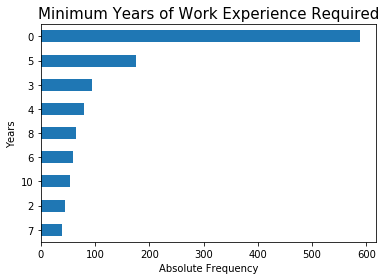

In [36]:
#Calculando o tempo mínimo de experiência
df_jobs['Min_ys_exp'] = df_jobs['Minimum Qualifications'].apply(lambda x : re.findall(r'([0-9]+) year',x))
df_jobs['Min_ys_exp'] = df_jobs['Min_ys_exp'].apply(lambda x : [0] if len(x)==0 else x)
df_jobs['Min_ys_exp'] = df_jobs['Min_ys_exp'].apply(lambda x : max(x))

#plot min exp yrs
df_freq_minexpyrs = pd.DataFrame.from_dict(Counter(df_jobs["Min_ys_exp"]), orient='index').reset_index()
df_freq_minexpyrs=df_freq_minexpyrs.sort_values(by=[0],ascending= False).rename(columns = {0: 'freq', 'index':'Years'})
df_freq_minexpyrs = df_freq_minexpyrs.set_index('Years')
df_top_freq_minexpyrs = df_freq_minexpyrs[df_freq_minexpyrs["freq"] >= 20]
df_top_freq_minexpyrs.sort_values(by=["freq"],ascending= True).plot.barh(y = 'freq',legend=False)
plt.title("Minimum Years of Work Experience Required",fontsize= 15)
plt.xlabel('Absolute Frequency')
plt.show()

In [37]:
#Calculando o tempo médio de experiência por categria de job (em anos)

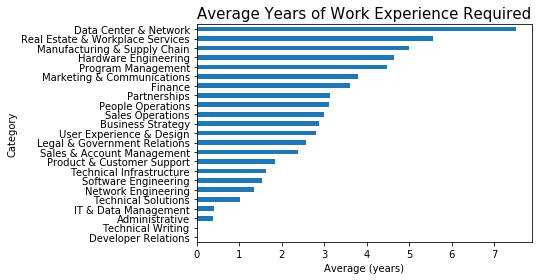

In [38]:
df_jobs["Min_ys_exp"] = pd.to_numeric(df_jobs["Min_ys_exp"])
df_mean_expyrs = df_jobs.groupby('Category').Min_ys_exp.agg(mean_yrs='mean')
df_mean_expyrs.sort_values(by=["mean_yrs"],ascending= True).plot.barh(y = 'mean_yrs',legend=False)
plt.title("Average Years of Work Experience Required",fontsize= 15)
plt.xlabel('Average (years)')
plt.show()

# As questões 5 e 6 serão abordadas na conversa presencial sobre o case e levarão em conta todas as análises realizadas até aqui.